# Multi-class Classification: Neural Networks (only Forward Propagation)

This notebook contains the last part of the Programming Exercise 3 of the Andrew Ng's course on Coursera.

Implement a multi-class classification model using Neural Networks to recognize handwritten numbers (0-9). We will only implement the Forward Propagation as the model has already been trained and the Theta values have been provided.

The NN has 3 levels:
- L1: 401 = 400 (20x20) features + 1 bias
- L2: 25 + 1 bias
- L3: 10 classification labels

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data
Same as previous exercise with Logistic Regression Classifier

In [6]:
# Load the data (in .mat format)
from scipy.io import loadmat
data = loadmat('ex3data1.mat')

X = data['X']
y = data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

## Load trained model (theta values)

In [7]:
# Load the data (in .mat format)
from scipy.io import loadmat
thetas = loadmat('ex3weights.mat')
theta1, theta2 = thetas['Theta1'], thetas['Theta2']

In [9]:
print("theta1 has shape:",theta1.shape)
print("theta2 has shape:",theta2.shape)

theta1 has shape: (25, 401)
theta2 has shape: (10, 26)


- a1 => 401 (400 + 1)
- theta1 => 25 x 401
- a2 => 26 (25 + 1)
- theta2 => 10 x 26
- a3 => 10

## Forward Propagation

In this exercise we will only implement the Forward Propagation because we are given a set of precimputed parameters theta. In a real modelization, the Forward Propagation is used to compute the cost: we inject the input features X to the network and apply the Forward Propagation algorithm to obtain the predicted classifications (h). The cost function summarizes the differences between the predicted and the real classifications. The cost function is implemented in the next exercise.

In [10]:
# sigmoid function definition
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
# Function that receives as input:
#   - X[ num_samples x num_features ]
#   - theta1[ num_L2_units_no_bias x (num_features+1) ]
#   - theta2[ num_output_labels x num_L2_units_with_bias ]
# and returns:
#   - all the forward propagation steps
#     - a1 [ num_samples x (num_features+1) ]
#     - z2 [ num_samples x num_L2_units_no_bias ]
#     - a2 [ num_samples x num_L2_units_with_bias ]
#     - z3 [ num_samples x num_output_labels ]
#     - h  [ num_samples x num_output_labels ]
def forward_propagate(X, theta1, theta2):
    
    # convert to matrices to use notation of algebra operations
    X = np.matrix(X)
    theta1 = np.matrix(theta1)
    theta2 = np.matrix(theta2)
    
    # set helper variable
    num_features = X.shape[0]
    
    # add the bias unit at Level 1 (a1 is a vector of [num_samplesx401])
    a1 = np.insert(X, 0, values=np.ones(num_features), axis=1)
    
    # Compute z2 (a1[1x401] · theta1.T[401x25] = z2[1x25])
    z2 = a1 * theta1.T
    
    # Compute a2, and add the bias unit at Level 2 (a2 is a vector of [num_samplesx26])
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(num_features), axis=1)
    
    # Compute z3 (a2[num_samplesx26] · theta2.T[26x10] = z2[num_samplesx10])
    z3 = a2 * theta2.T

    # Compute h (or a3) (h is a vector of [num_samplesx10])
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [21]:
# Execute the forward propagation for a single sample of X
a1, z2, a2, z3, h = forward_propagate(X[0,:], theta1, theta2)

In [22]:
print("a1 has shape:    ", a1.shape)
print("theta1 has shape:", theta1.shape)
print("z2 has shape:    ", z2.shape)
print("a2 has shape:    ", a2.shape)
print("theta2 has shape:", theta2.shape)
print("z3 has shape:    ", z3.shape)
print("h (a3) has shape:", h.shape)

a1 has shape:     (1, 401)
theta1 has shape: (25, 401)
z2 has shape:     (1, 25)
a2 has shape:     (1, 26)
theta2 has shape: (10, 26)
z3 has shape:     (1, 10)
h (a3) has shape: (1, 10)


In [25]:
# Execute the forward propagation for a several samples of X (forward_propagate is a vectorized implementation)
a1, z2, a2, z3, h = forward_propagate(X[0:50,:], theta1, theta2)

In [26]:
print("a1 has shape:    ", a1.shape)
print("theta1 has shape:", theta1.shape)
print("z2 has shape:    ", z2.shape)
print("a2 has shape:    ", a2.shape)
print("theta2 has shape:", theta2.shape)
print("z3 has shape:    ", z3.shape)
print("h (a3) has shape:", h.shape)

a1 has shape:     (50, 401)
theta1 has shape: (25, 401)
z2 has shape:     (50, 25)
a2 has shape:     (50, 26)
theta2 has shape: (10, 26)
z3 has shape:     (50, 10)
h (a3) has shape: (50, 10)


OK! Shapes are correct! :)

## Classification

In [72]:
# Let's predict all samples in X using the provided model
num_correct = 0
incorrect_indices = []
y_predictions = []
for sample in range(X.shape[0]):
    labels = range(1,10) + [10]
    a1, z2, a2, z3, h = forward_propagate(X[sample], theta1, theta2)
    label_predicted = labels[np.argmax(h)]
    y_predictions.append(label_predicted)
    if(y[sample].item(0) == label_predicted):
        # print "original: ",y[sample].item(0)," | predicted: ", labels[np.argmax(h)]," RIGHT"
        num_correct = num_correct + 1
    else:
        #print "original: ",y[sample].item(0)," | predicted: ", labels[np.argmax(h)]," WRONG"
        incorrect_indices.append(sample)

In [73]:
# Compute accuracy of the classifier
accuracy = float(num_correct) / (num_correct + len(incorrect_indices))
print('Accuracy = {0}%'.format(accuracy * 100))

Accuracy = 97.52%


Not bad... The same as the accuracy I got with the Logistic Regression Classifier

## Visualization of the wrong classification

In [74]:
# Helper functions to visualize the data (from https://github.com/kaleko/CourseraML/blob/master/ex3/ex3.ipynb)

import scipy.misc #Used to show matrix as an image
import random #To pick random images to display
import matplotlib.cm as cm #Used to display images in a specific colormap

def getDatumImg(row):
    # Function that is handed a single np array with shape 1x400, creates an image object from it, and returns it
    width, height = 20, 20
    square = row[0:].reshape(width,height)
    return square.T

def displayData(indices_to_display = None):
    # Function that picks 100 random rows from X, creates a 20x20 image from each, then stitches them together into a 10x10 grid of images, and shows it
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

array([[ 8,  9,  4,  6,  3,  7,  8,  4,  8,  2],
       [ 8,  4,  9,  6,  7,  5,  9,  4, 10,  4],
       [ 8,  6,  6,  4,  8,  1, 10, 10,  5,  7],
       [ 2,  6,  2,  8,  9,  5,  5,  7,  1,  7],
       [ 5,  5,  5,  5,  9,  1,  7,  5,  9,  6],
       [ 2,  1,  1,  9,  9,  2,  9,  9,  8,  6],
       [ 9,  9,  6,  9,  3,  2,  4,  3,  6,  3],
       [ 3,  6, 10,  5,  1,  1,  5,  5, 10,  1],
       [ 4,  4,  4,  4,  9, 10,  2,  2,  9,  1],
       [ 9,  1,  3,  9,  4,  1,  2,  1,  5,  1]])

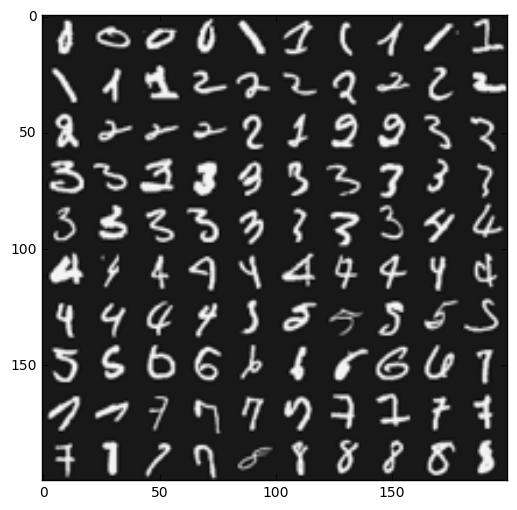

In [81]:
# Visualization of the first 100 wrong predictions
displayData(incorrect_indices[:100])
y_predictions_np = np.array(y_predictions)
y_predictions_np[incorrect_indices[:100]].reshape(10,10)

There are really some curious mistaken classifications...